In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=42
)

In [3]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [4]:
# Faz predições
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcula métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")
print(f"AUC-ROC   : {auc:.2f}")

Precision : 0.97
Recall    : 0.99
F1-Score  : 0.98
AUC-ROC   : 1.00


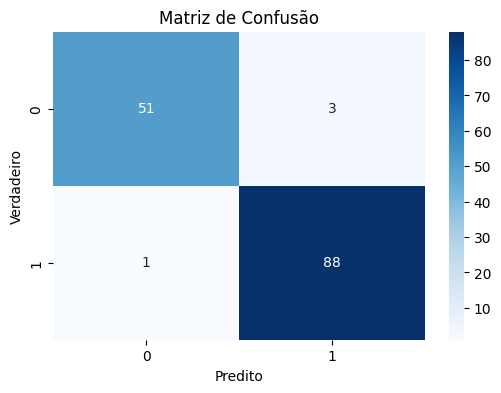

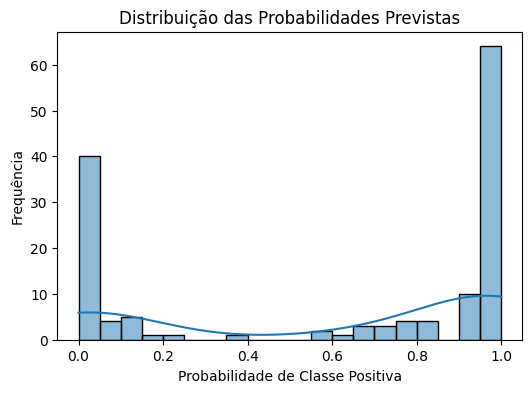

In [5]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Distribuição das probabilidades
plt.figure(figsize=(6, 4))
sns.histplot(y_pred_proba, bins=20, kde=True)
plt.title('Distribuição das Probabilidades Previstas')
plt.xlabel('Probabilidade de Classe Positiva')
plt.ylabel('Frequência')
plt.show()